
# Tutorial: Using NumPy and Pandas for Weather and Climate Data Analysis

In this comprehensive tutorial, we will explore the powerful capabilities of NumPy and Pandas libraries for handling and analyzing weather and climate datasets. This guide is tailored for PhD student trainees who are new to Python, providing a solid foundation in data manipulation, analysis, and visualization techniques essential for climate research.

## Table of Contents
1. Introduction to NumPy and Pandas
2. Loading and Structuring Weather Data
3. Exploratory Data Analysis with Pandas
4. Advanced Data Manipulation Techniques
5. Numerical Computations with NumPy
6. Data Visualization Strategies
7. Climate Trend Analysis



## 1. Introduction to NumPy and Pandas

NumPy and Pandas are fundamental libraries in the Python ecosystem for scientific computing and data analysis. 

- **NumPy** (Numerical Python) provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
- **Pandas** builds on NumPy and offers data structures like DataFrames, which allow you to work with labeled and structured data intuitively.

Let's start by importing these libraries and checking their versions:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2



## 2. Loading and Structuring Weather Data

In climate research, you often work with time series data. Pandas provides excellent tools for handling date-based information. In this section, we'll create a synthetic weather dataset to demonstrate data loading and structuring techniques.

We'll generate:
- A date range for a year
- Daily temperature values (in &deg;C) following a normal distribution
- Daily rainfall values (in mm) following an exponential distribution

This approach simulates realistic weather patterns while providing a controlled dataset for learning purposes.


In [4]:

# Generate a sample weather dataset
np.random.seed(42)  # For reproducibility
dates = pd.date_range('2023-01-01', periods=365, freq='D')
temperatures = np.random.normal(15, 5, 365)  # Mean of 15�C, std dev of 5�C
rainfall = np.random.exponential(5, 365)  # Mean of 5mm

weather_data = pd.DataFrame({
    'date': dates,
    'temperature': temperatures,
    'rainfall': rainfall
})

print("First few rows of the dataset:")
print(weather_data.head())

print("Dataset information:")
print(weather_data.info())


First few rows of the dataset:
        date  temperature   rainfall
0 2023-01-01    17.483571   1.265410
1 2023-01-02    14.308678  16.514351
2 2023-01-03    18.238443   0.061145
3 2023-01-04    22.615149  17.512635
4 2023-01-05    13.829233   0.220595
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    datetime64[ns]
 1   temperature  365 non-null    float64       
 2   rainfall     365 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB
None



## 3. Exploratory Data Analysis with Pandas

Exploratory Data Analysis (EDA) is a critical first step in understanding your dataset. Pandas offers a variety of methods to quickly gain insights into your data's structure, statistical properties, and potential issues.

### 3.1 Basic Statistical Summary

The `describe()` method provides a concise statistical summary of your numerical columns:


In [5]:

# Display summary statistics
print(weather_data.describe())


                      date  temperature    rainfall
count                  365   365.000000  365.000000
mean   2023-07-02 00:00:00    15.049732    5.123053
min    2023-01-01 00:00:00    -1.206337    0.023214
25%    2023-04-02 00:00:00    11.733354    1.411534
50%    2023-07-02 00:00:00    15.291044    3.500026
75%    2023-10-01 00:00:00    18.128337    6.896786
max    2023-12-31 00:00:00    34.263657   40.862228
std                    NaN     4.740255    5.302150



### 3.2 Checking for Missing Values

Missing data can significantly impact your analysis. It's crucial to identify and handle missing values appropriately:


In [7]:

# Check for missing values
print("Missing values in each column:")
print(weather_data.isnull().sum())

# If there were missing values, you could handle them like this:
# weather_data_cleaned = weather_data.dropna()  # Remove rows with missing values
# or
# weather_data_filled = weather_data.fillna(method='ffill')  # Forward-fill missing values


Missing values in each column:
date           0
temperature    0
rainfall       0
dtype: int64



## 4. Advanced Data Manipulation Techniques

Pandas excels in data manipulation tasks. Here, we'll explore some advanced techniques particularly useful for climate data analysis.

### 4.1 Setting Date as Index

Setting the date column as the index of your DataFrame allows for easier time-based operations:


In [9]:

# Set the date as the index
weather_data.set_index('date', inplace=True)
print(weather_data.head())


            temperature   rainfall
date                              
2023-01-01    17.483571   1.265410
2023-01-02    14.308678  16.514351
2023-01-03    18.238443   0.061145
2023-01-04    22.615149  17.512635
2023-01-05    13.829233   0.220595



### 4.2 Resampling Data

Resampling allows you to change the frequency of your time series data. This is particularly useful when working with data collected at different intervals or when you need to analyze trends over different time scales:


In [10]:

# Resample to monthly data
monthly_data = weather_data.resample('M').agg({
    'temperature': 'mean',
    'rainfall': 'sum'
})

print("Monthly aggregated data:")
print(monthly_data.head())


Monthly aggregated data:
            temperature    rainfall
date                               
2023-01-31    13.992562  202.481253
2023-02-28    14.284158  203.622937
2023-03-31    15.219692  216.519368
2023-04-30    14.898742  143.553157
2023-05-31    14.580927  100.073630


C:\Users\ul834417\AppData\Local\Temp\ipykernel_24888\1183266310.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = weather_data.resample('M').agg({



### 4.3 Filtering Data

Pandas provides powerful indexing and selection capabilities. Here's an example of filtering data for summer months:


In [11]:

# Filter data for summer months (June, July, August)
summer_data = weather_data[weather_data.index.month.isin([6, 7, 8])]
print("Summer months data:")
print(summer_data.head())


Summer months data:
            temperature  rainfall
date                             
2023-06-01    16.732241  6.896786
2023-06-02    11.599876  1.019898
2023-06-03    16.161268  1.174495
2023-06-04    16.465362  2.313926
2023-06-05    11.428243  3.313313



## 5. Numerical Computations with NumPy

NumPy's efficient array operations make it ideal for performing numerical computations on large datasets. Let's explore some common operations in climate data analysis.

### 5.1 Unit Conversion

Converting between different units of measurement is a common task in climate science:


In [13]:

# Convert temperature from Celsius to Fahrenheit
weather_data['temperature_F'] = weather_data['temperature'] * 9/5 + 32

print("Dataset with temperature in both Celsius and Fahrenheit:")
print(weather_data.head())


Dataset with temperature in both Celsius and Fahrenheit:
            temperature   rainfall  temperature_F
date                                             
2023-01-01    17.483571   1.265410      63.470427
2023-01-02    14.308678  16.514351      57.755621
2023-01-03    18.238443   0.061145      64.829197
2023-01-04    22.615149  17.512635      72.707269
2023-01-05    13.829233   0.220595      56.892620



### 5.2 Moving Averages

Calculating moving averages helps in smoothing out short-term fluctuations and highlighting longer-term trends:


In [14]:

# Calculate moving average temperature (7-day window)
weather_data['temp_moving_avg'] = weather_data['temperature'].rolling(window=7).mean()

print("Dataset with 7-day moving average temperature:")
print(weather_data.head(10))


Dataset with 7-day moving average temperature:
            temperature   rainfall  temperature_F  temp_moving_avg
date                                                              
2023-01-01    17.483571   1.265410      63.470427              NaN
2023-01-02    14.308678  16.514351      57.755621              NaN
2023-01-03    18.238443   0.061145      64.829197              NaN
2023-01-04    22.615149  17.512635      72.707269              NaN
2023-01-05    13.829233   0.220595      56.892620              NaN
2023-01-06    13.829315  11.088606      56.892767              NaN
2023-01-07    22.896064   3.750716      73.212915        17.600065
2023-01-08    18.837174  24.784143      65.906913        17.793437
2023-01-09    12.652628   0.383307      54.774731        17.556858
2023-01-10    17.712800   4.035548      63.883040        17.481766



### 5.3 Identifying Extreme Events

NumPy's mathematical functions can be used to identify extreme weather events:


In [15]:

# Find days with extreme temperatures (beyond 2 standard deviations from the mean)
temp_mean = weather_data['temperature'].mean()
temp_std = weather_data['temperature'].std()
extreme_temp_days = weather_data[np.abs(weather_data['temperature'] - temp_mean) > 2 * temp_std]

print("Days with extreme temperatures:")
print(extreme_temp_days)


Days with extreme temperatures:
            temperature   rainfall  temperature_F  temp_moving_avg
date                                                              
2023-01-14     5.433599   5.949506      41.780478        13.742896
2023-02-07     5.201649   0.887368      41.362969        14.022832
2023-03-16     1.901274   1.298019      35.422294        15.375015
2023-03-21     5.062155   5.567206      41.111880        13.327880
2023-04-21     5.406144   3.387514      41.731059        15.405616
2023-04-24    27.316211  19.568265      81.169179        15.668478
2023-05-06    25.952278   2.120697      78.714101        17.437024
2023-06-29    28.600846   5.683165      83.481522        18.833625
2023-07-29    34.263657   2.536290      93.674583        17.953506
2023-08-09    26.573293   7.337369      79.831927        15.960875
2023-08-23    25.719720   2.051918      78.295497        15.705930
2023-08-25     4.874287   0.327361      40.773717        14.737703
2023-09-10    25.610781  13.93


## 6. Data Visualization Strategies

Visualization is crucial for understanding patterns and trends in climate data. Matplotlib, which we imported earlier, is a powerful library for creating a wide range of plots.

### 6.1 Time Series Plot

Let's create a time series plot of daily temperatures and the 7-day moving average:


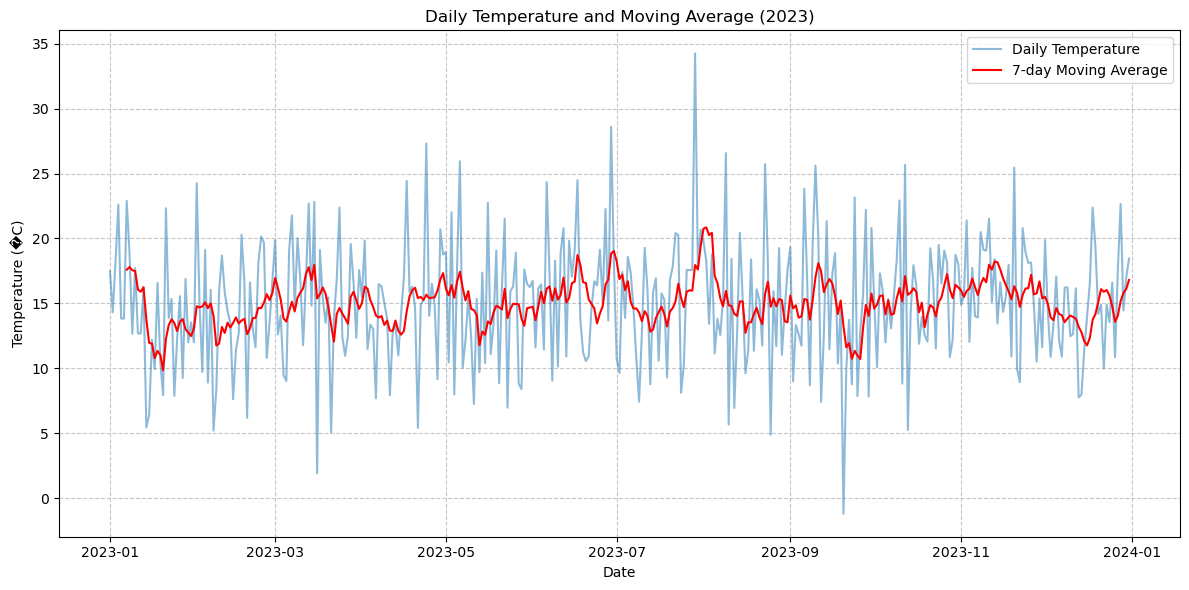

In [17]:

plt.figure(figsize=(12, 6))
plt.plot(weather_data.index, weather_data['temperature'], label='Daily Temperature', alpha=0.5)
plt.plot(weather_data.index, weather_data['temp_moving_avg'], label='7-day Moving Average', color='red')
plt.title('Daily Temperature and Moving Average (2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (�C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### 6.2 Rainfall Distribution

A histogram can help visualize the distribution of daily rainfall:


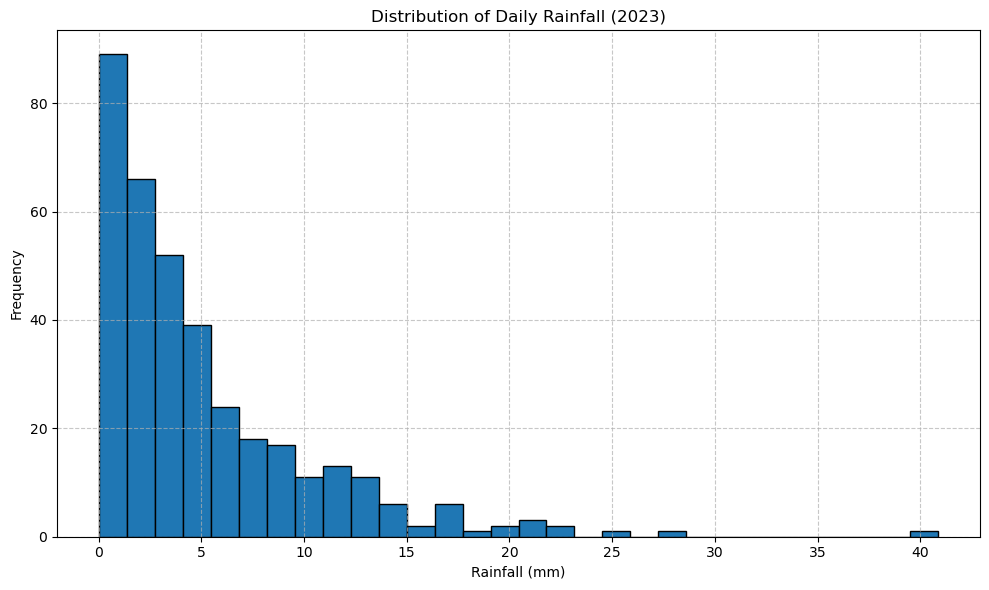

In [19]:

plt.figure(figsize=(10, 6))
weather_data['rainfall'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Daily Rainfall (2023)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## 7. Climate Trend Analysis

Analyzing long-term trends is a fundamental aspect of climate research. Here, we'll demonstrate a simple trend analysis using our synthetic dataset.

### 7.1 Calculating and Visualizing Temperature Anomalies

Temperature anomalies, or deviations from the mean, can help identify unusual patterns:


C:\Users\ul834417\AppData\Local\Temp\ipykernel_24888\154967996.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = weather_data['temperature'].resample('M').mean()


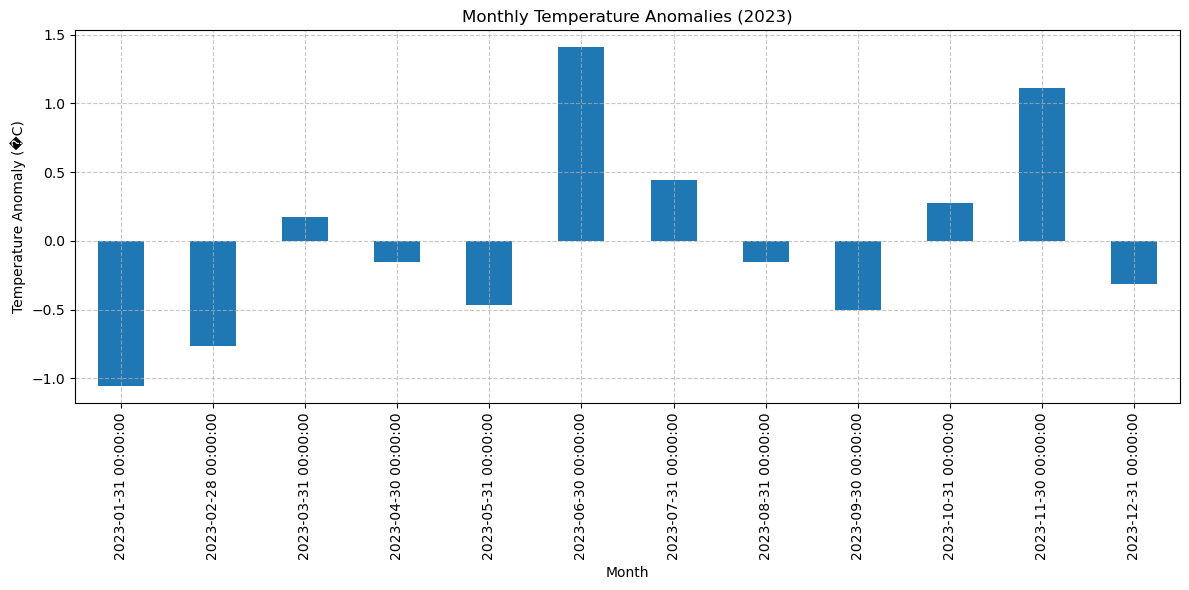

In [21]:

# Calculate monthly temperature anomalies
monthly_temp = weather_data['temperature'].resample('M').mean()
temp_anomalies = monthly_temp - monthly_temp.mean()

# Plot temperature anomalies
plt.figure(figsize=(12, 6))
temp_anomalies.plot(kind='bar')
plt.title('Monthly Temperature Anomalies (2023)')
plt.xlabel('Month')
plt.ylabel('Temperature Anomaly (�C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### 7.2 Linear Regression for Trend Analysis

While our synthetic dataset spans only one year, in practice, you would use this technique on multi-year data to detect long-term trends:


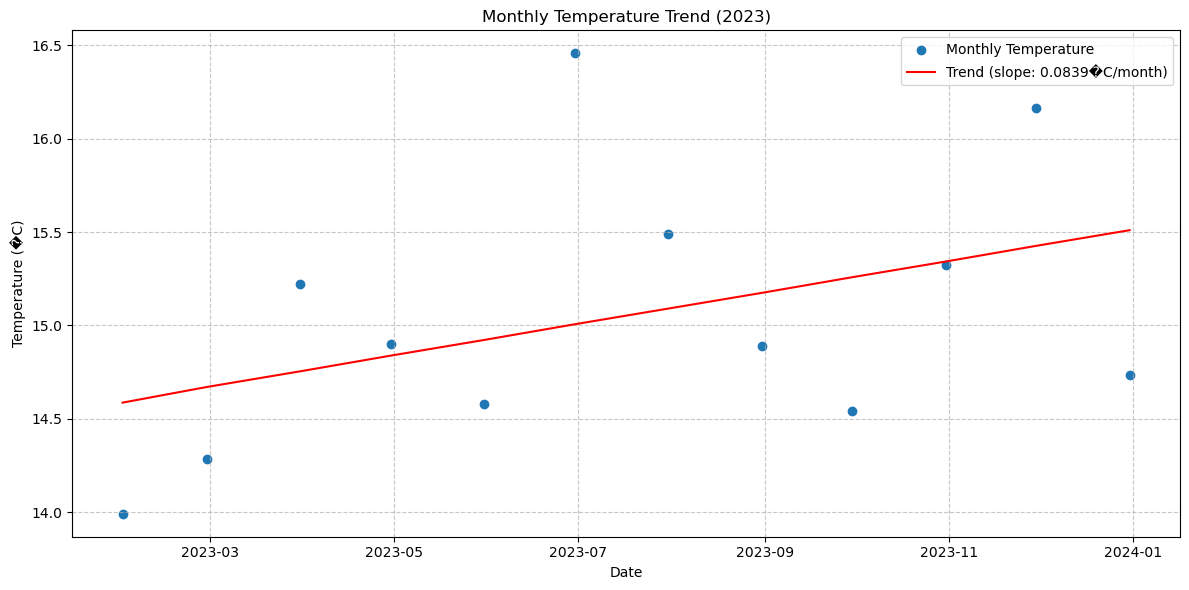

p-value: 0.1797
There is no statistically significant trend.


In [22]:

from scipy import stats

# Prepare data for regression
x = np.arange(len(monthly_temp))
y = monthly_temp.values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot the data and the trend line
plt.figure(figsize=(12, 6))
plt.scatter(monthly_temp.index, monthly_temp, label='Monthly Temperature')
plt.plot(monthly_temp.index, intercept + slope * x, color='red', 
         label=f'Trend (slope: {slope:.4f}�C/month)')
plt.title('Monthly Temperature Trend (2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (�C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant trend.")
else:
    print("There is no statistically significant trend.")



## Conclusion

This tutorial has provided a comprehensive introduction to using NumPy and Pandas for weather and climate data analysis. We've covered:

1. Basic data loading and structuring techniques
2. Exploratory data analysis using Pandas
3. Advanced data manipulation methods
4. Numerical computations with NumPy
5. Data visualization strategies
6. Simple climate trend analysis

These tools and techniques form a solid foundation for more advanced climate data analysis and modeling. As you progress in your research, you'll find that mastering these libraries will greatly enhance your ability to work with complex climate datasets efficiently.

Remember that while we used synthetic data for this tutorial, the same principles apply to real-world climate data. When working with actual climate datasets, always be mindful of data quality, missing values, and the specific characteristics of your data source.

Continue exploring these libraries and their documentation to discover more advanced features that can aid in your climate research endeavors.
